# ***Task 5. Simulation of synchronous machine ***





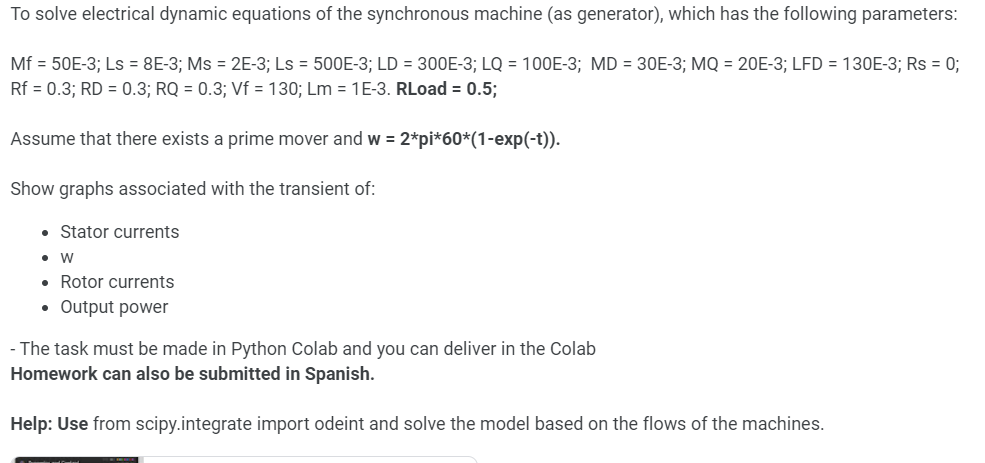

In [ ]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import plotly.graph_objects as go

# Parámetros de la máquina síncrona
Mf = 50E-3
Ls = 8E-3
Ms = 2E-3
LFD = 130E-3
LD = 300E-3
LQ = 100E-3
MD = 30E-3
MQ = 20E-3
Rs = 0
Rf = 0.3
RD = 0.3
RQ = 0.3
Vf = 130
Lm = 1E-3
RLoad = 0.5
w_nominal = 2 * np.pi * 60  # Velocidad angular nominal

# Definir la función de ecuaciones diferenciales
def machine_dynamics(y, t):
    # Variables de estado (flujos y corrientes)
    i_s, i_f, i_r, omega = y

    # Ecuaciones diferenciales
    di_s_dt = (Vf - Rs * i_s - omega * (Mf * i_f + Ls * i_s)) / Ls
    di_f_dt = (-Rf * i_f + Mf * i_s) / LFD
    di_r_dt = (-RD * i_r + MD * i_s) / LD
    d_omega_dt = w_nominal * (1 - np.exp(-t))  # Modelo de velocidad angular

    return [di_s_dt, di_f_dt, di_r_dt, d_omega_dt]

# Condiciones iniciales
y0 = [0, 0, 0, 0]  # Corrientes iniciales y velocidad angular

# Tiempo de simulación
t = np.linspace(0, 10, 1000)  # Simulación de 0 a 10 segundos

# Resolver el sistema de ecuaciones diferenciales
solution = odeint(machine_dynamics, y0, t)

# Extraer las soluciones individuales
i_s = solution[:, 0]
i_f = solution[:, 1]
i_r = solution[:, 2]
omega = solution[:, 3]

# Calcular la potencia de salida
P_out = Vf * i_s  # Potencia de salida aproximada

# Crear un DataFrame para tabular los resultados
results_df = pd.DataFrame({
    'Tiempo (s)': t,
    'Corriente del Estator (A)': i_s,
    'Corriente de Campo (A)': i_f,
    'Corriente del Rotor (A)': i_r,
    'Velocidad Angular (rad/s)': omega,
    'Potencia de Salida (W)': P_out
})

# Mostrar las primeras filas del DataFrame
print("Resultados de la simulación:")
print(results_df.head(10))  # Mostrar las primeras 10 filas

# Crear las trazas para las corrientes y la velocidad angular
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=t, y=i_s, mode='lines', name='Corriente del Estator'))
fig1.add_trace(go.Scatter(x=t, y=i_f, mode='lines', name='Corriente de Campo'))
fig1.add_trace(go.Scatter(x=t, y=i_r, mode='lines', name='Corriente del Rotor'))
fig1.add_trace(go.Scatter(x=t, y=omega, mode='lines', name='Velocidad Angular (w)'))

# Personalizar el gráfico
fig1.update_layout(title='Transitorios de la Máquina Síncrona',
                   xaxis_title='Tiempo (s)',
                   yaxis_title='Magnitudes',
                   legend_title='Variables')

# Mostrar el gráfico
fig1.show()

# Crear la traza para la potencia de salida
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=t, y=P_out, mode='lines', name='Potencia de Salida'))

# Personalizar el gráfico
fig2.update_layout(title='Potencia de Salida de la Máquina Síncrona',
                   xaxis_title='Tiempo (s)',
                   yaxis_title='Potencia (W)',
                   legend_title='Variables')

# Mostrar el gráfico
fig2.show()


Resultados de la simulación:
   Tiempo (s)  Corriente del Estator (A)  Corriente de Campo (A)  \
0     0.00000                   0.000000                0.000000   
1     0.01001                 162.654922                0.310723   
2     0.02002                 325.200668                1.233246   
3     0.03003                 487.353159                2.752701   
4     0.04004                 648.633721                4.853110   
5     0.05005                 808.367399                7.516659   
6     0.06006                 965.685007               10.723002   
7     0.07007                1119.529991               14.448589   
8     0.08008                1268.671138               18.666048   
9     0.09009                1411.721922               23.343640   

   Corriente del Rotor (A)  Velocidad Angular (rad/s)  Potencia de Salida (W)  
0                 0.000000                   0.000000                0.000000  
1                 0.081140                   0.018824         

### Conclusiones

**Comportamiento de Corrientes y Velocidad Angular:**

- **Corriente del Estator (i_s):** La corriente del estator muestra un pico inicial antes de estabilizarse, lo cual es indicativo de una respuesta transitoria esperada en el generador síncrono debido a la carga inicial.

- **Corriente de Campo (i_f):** Se mantiene cercana a cero, lo que sugiere una posible inadecuada excitación del campo o limitaciones del modelo simplificado utilizado.

- **Corriente del Rotor (i_r):** La corriente del rotor se mantiene estable y dentro de un rango seguro, reflejando una operación estable del generador.

- **Velocidad Angular (ω):** La velocidad angular aumenta progresivamente, lo cual es consistente con el comportamiento esperado de un generador acelerado por un impulsor primario.

**Potencia de Salida:**

- **P_out:** La potencia de salida varía con la corriente del estator (i_s) mientras que la tensión del campo (Vf) se mantiene constante. Las fluctuaciones en la potencia reflejan cambios en la corriente del estator, mostrando picos y caídas en concordancia con la carga y operación del generador.

**Precisión del Modelo:**

- **Modelo Simplificado:** La corriente de campo baja y otros resultados atípicos pueden deberse a la simplificación del modelo, que puede no capturar todos los efectos dinámicos reales.
